In [1]:
import pandas as pd

In [ ]:
df = [[ 0.71097398  0.05058677  9.00748032 36.25955707],
      [ 0.86977024  0.04142645 12.26455863 39.77378299],
      [1.03729362e+00 3.81311206e-02 1.39326671e+01 4.49999996e+01],
      [9.97979863e-01 3.65099811e-02 1.47971718e+01 4.49999989e+01],
      [1.00349373e+00 3.51686695e-02 1.53463210e+01 5.67019633e+01],
      [1.02822308e+00 3.45756554e-02 1.57087612e+01 5.69999987e+01],
      [1.01856409e+00 3.48619470e-02 1.55570283e+01 6.13852626e+01]] 
a1=0.00055

In [2]:
parameters_df = pd.DataFrame({"k1": [0.71097398, 0.86977024, 1.03729362e+00, 9.97979863e-01, 1.00349373e+00, 1.02822308e+00, 1.01856409e+00],
                              "A": [0.05058677, 0.04142645, 3.81311206e-02, 3.65099811e-02, 3.51686695e-02, 3.45756554e-02, 3.48619470e-02],
                              "sigma": [9.00748032, 12.26455863, 1.39326671e+01, 1.47971718e+01, 1.53463210e+01, 1.57087612e+01, 1.55570283e+01],
                              "x0": [36.25955707, 39.77378299, 4.49999996e+01, 4.49999989e+01, 5.67019633e+01, 5.69999987e+01, 6.13852626e+01]})

In [ ]:
df = [[ 0.83275602  0.06057984  6.98854886 30.51716023],
      [ 0.97279224  0.05829162  7.43675627 32.15863843],
      [ 1.03153117  0.055742    7.89037426 35.31857485],
      [ 1.06349476  0.05467681  8.07180889 36.77151896],
      [ 1.10871768  0.05371501  8.22489433 42.54499648]]

In [4]:
import seaborn as sns

sns.set_theme()

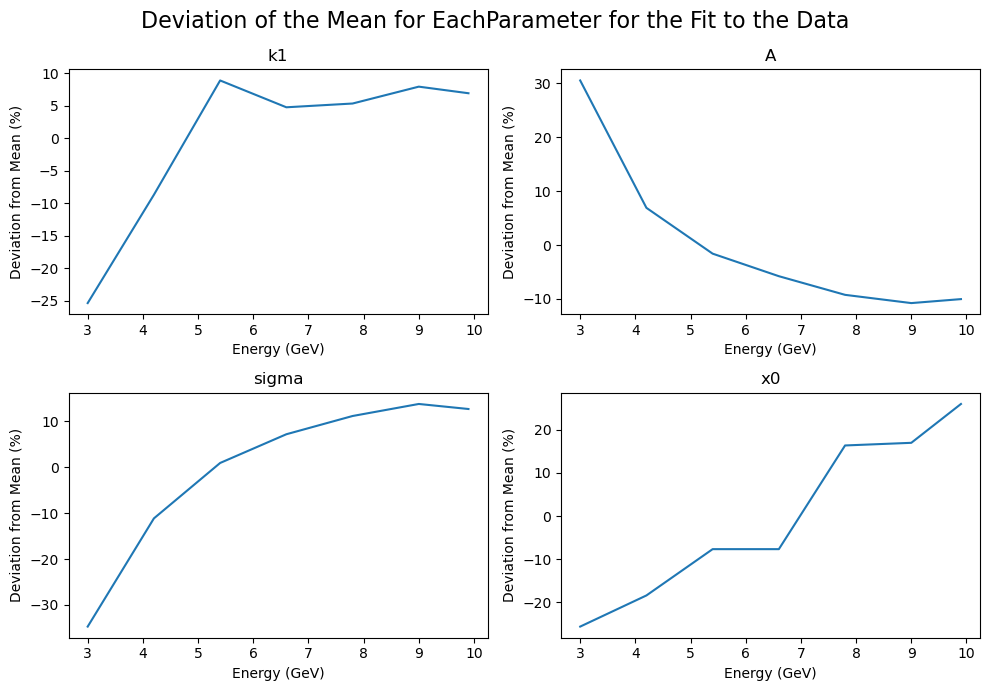

In [3]:
import matplotlib.pyplot as plt

# Create a figure with a 3x3 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Flatten the array of axes
axs = axs.flatten()

x_values = [3, 4.2, 5.4, 6.6, 7.8, 9, 9.9]

# Iterate over each column (parameter) in the DataFrame
for i, col in enumerate(parameters_df.columns):
    # Calculate the percentage deviation from the mean
    deviation = (parameters_df[col] - parameters_df[col].mean()) / parameters_df[col].mean() * 100

    # Plot the percentage deviation with the specified x-values
    axs[i].plot(x_values, deviation)
    axs[i].set_title(col)
    axs[i].set_xlabel("Energy (GeV)")
    axs[i].set_ylabel("Deviation from Mean (%)")

fig.suptitle("Deviation of the Mean for EachParameter for the Fit to the Data", fontsize=16)

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig("parameters.png")

# Show the plot
plt.show()

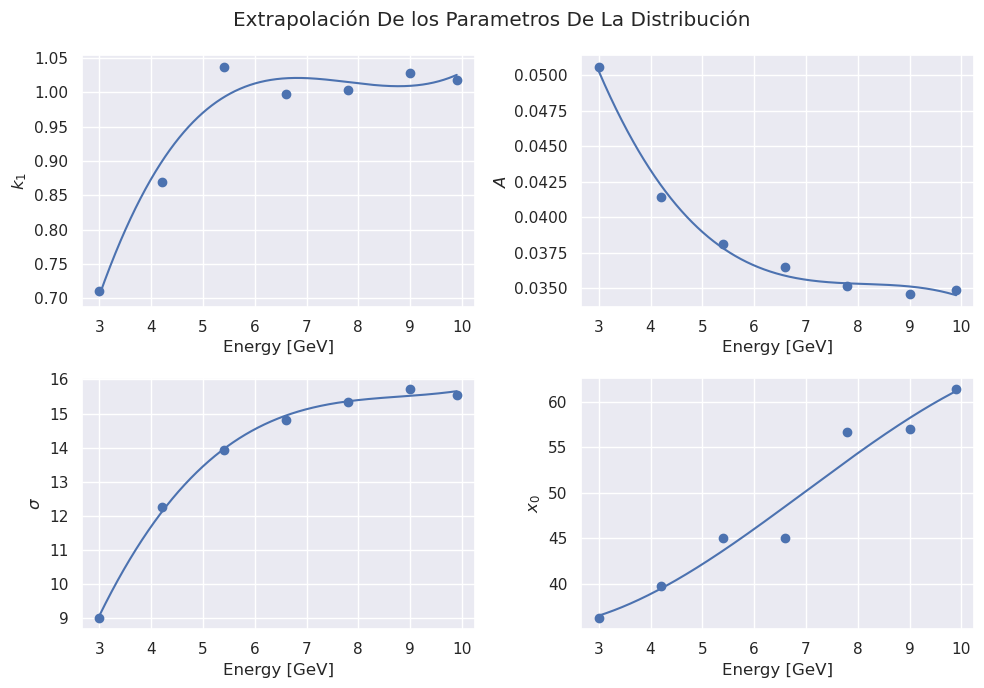

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

x_values = np.array([3, 4.2, 5.4, 6.6, 7.8, 9, 9.9])

# Initialize a dictionary to store the polynomial coefficients for each parameter
poly_coeffs = {}

# Loop over each column in the DataFrame
for column in parameters_df.columns:
    y_values = parameters_df[column].values
    coeffs = np.polyfit(x_values, y_values, deg=3)  # Fit a polynomial of degree 5
    poly_coeffs[column] = coeffs

# Initialize a dictionary to store the polynomial functions for each parameter
poly_funcs = {}

# Loop over each parameter
for param, coeffs in poly_coeffs.items():
    # Create a polynomial function using the coefficients
    poly_func = np.poly1d(coeffs)
    poly_funcs[param] = poly_func

# Create a grid of x-values for plotting the functions
x_grid = np.linspace(x_values.min(), x_values.max(), 1000)

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Set the title for the figure
fig.suptitle("Extrapolación De los Parametros De La Distribución")

# Loop over each parameter and each subplot
latex_labels = {
    'k1': '$k_1$',
    'A': '$A$',
    'sigma': '$\sigma$',
    'x0': '$x_0$'
}

for ax, (param, poly_func) in zip(axs.flatten(), poly_funcs.items()):
    ax.scatter(x_values, parameters_df[param], label=f'{latex_labels[param]} data')
    ax.plot(x_grid, poly_func(x_grid), label=f'{latex_labels[param]} fit')
    ax.set_xlabel("Energy [GeV]")
    ax.set_ylabel(latex_labels[param])

plt.tight_layout()
plt.show()

In [7]:
# In the first notebook
import joblib
joblib.dump(poly_funcs, 'poly_funcs.pkl')

['poly_funcs.pkl']

In [ ]:
a = [[ 0.47425856  0.0807133   7.77882017 14.99999981]
    ,[ 0.56084054  0.0818667   7.84000438 14.99999996],
    [ 0.61080953  0.0822197   7.612812   14.99999986]
    ,[ 0.62232049  0.08246364  7.46580351 14.9999999 ],
    [ 0.63159574  0.08245329  7.28456843 14.99999992],
    , 0.66327925  0.08292032  6.64388261 15.        ]]

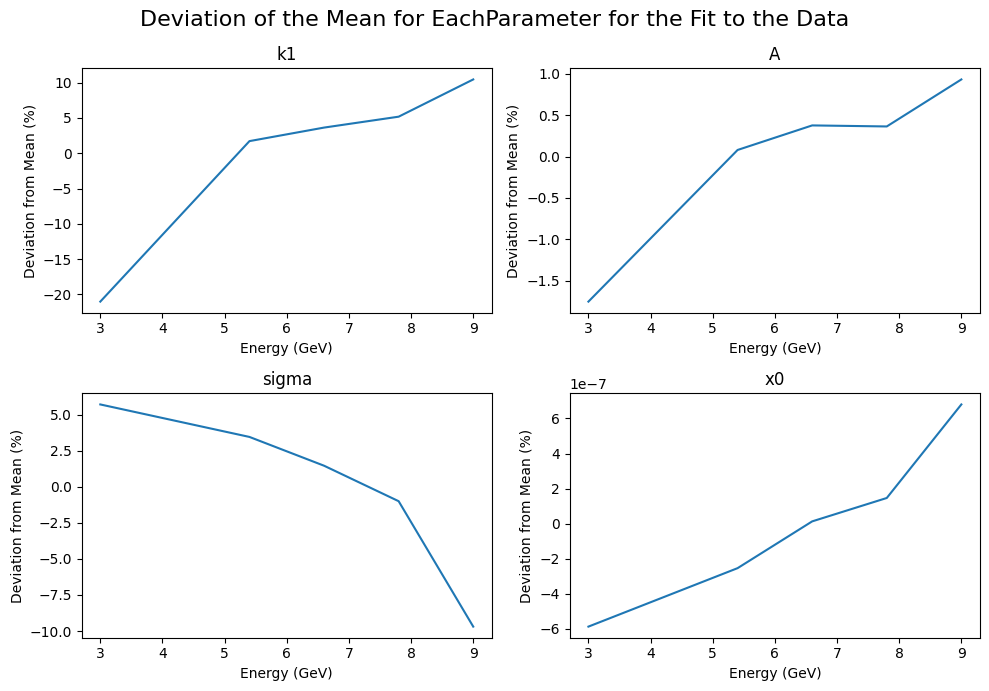

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

parameters_df = pd.DataFrame({"k1": [0.47425856, 0.61080953, 0.62232049, 0.63159574, 0.66327925],
                                "A": [0.0807133, 0.0822197, 0.08246364, 0.08245329, 0.08292032],
                                "sigma": [7.77882017, 7.612812, 7.46580351, 7.28456843, 6.64388261],
                                "x0": [14.99999981, 14.99999986, 14.9999999, 14.99999992, 15]})

# Create a figure with a 3x3 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Flatten the array of axes
axs = axs.flatten()

x_values = [3, 5.4, 6.6, 7.8, 9]

# Iterate over each column (parameter) in the DataFrame
for i, col in enumerate(parameters_df.columns):
    # Calculate the percentage deviation from the mean
    deviation = (parameters_df[col] - parameters_df[col].mean()) / parameters_df[col].mean() * 100

    # Plot the percentage deviation with the specified x-values
    axs[i].plot(x_values, deviation)
    axs[i].set_title(col)
    axs[i].set_xlabel("Energy (GeV)")
    axs[i].set_ylabel("Deviation from Mean (%)")

fig.suptitle("Deviation of the Mean for EachParameter for the Fit to the Data", fontsize=16)

# Adjust the layout
plt.tight_layout()

# Save the figure
plt.savefig("parameters.png")

# Show the plot
plt.show()

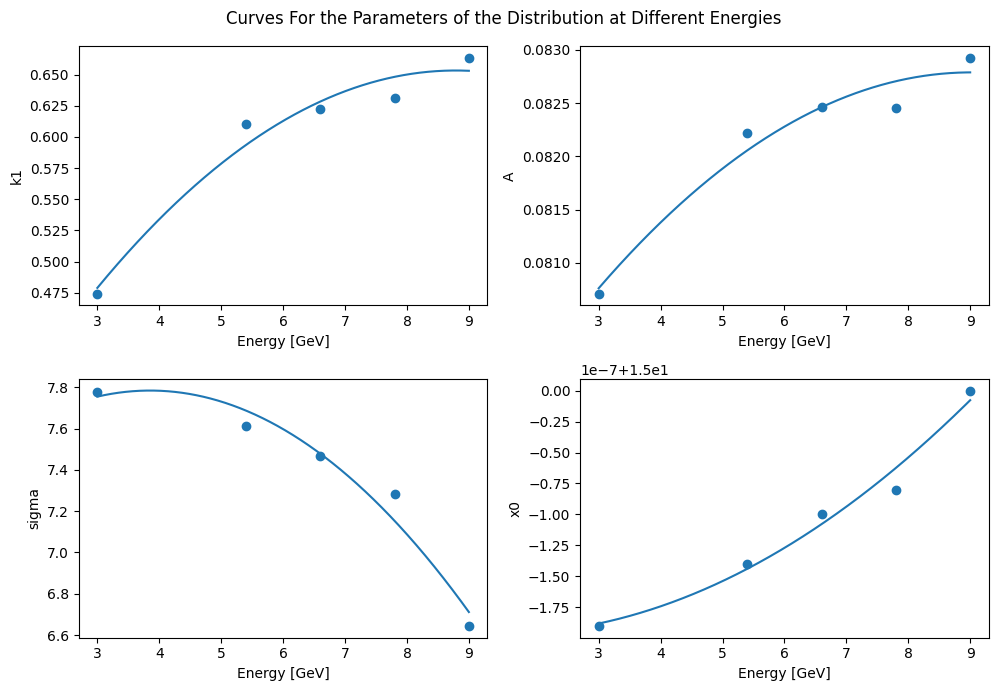

In [11]:
import numpy as np

x_values = np.array([3, 5.4, 6.6, 7.8, 9])

# Initialize a dictionary to store the polynomial coefficients for each parameter
poly_coeffs = {}

# Loop over each column in the DataFrame
for column in parameters_df.columns:
    y_values = parameters_df[column].values
    coeffs = np.polyfit(x_values, y_values, deg=2)  # Fit a polynomial of degree 5
    poly_coeffs[column] = coeffs

# Initialize a dictionary to store the polynomial functions for each parameter
poly_funcs = {}

# Loop over each parameter
for param, coeffs in poly_coeffs.items():
    # Create a polynomial function using the coefficients
    poly_func = np.poly1d(coeffs)
    poly_funcs[param] = poly_func

# Create a grid of x-values for plotting the functions
x_grid = np.linspace(x_values.min(), x_values.max(), 1000)

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

# Set the title for the figure
fig.suptitle("Curves For the Parameters of the Distribution at Different Energies")

# Loop over each parameter and each subplot
for ax, (param, poly_func) in zip(axs.flatten(), poly_funcs.items()):
    # Plot the original data
    ax.scatter(x_values, parameters_df[param], label=f'{param} data')
    # Plot the polynomial function
    ax.plot(x_grid, poly_func(x_grid), label=f'{param} fit')
    # Set the x-axis label
    ax.set_xlabel("Energy [GeV]")
    # Set the y-axis label
    ax.set_ylabel(param)

plt.tight_layout()
plt.show()

In [12]:
# In the first notebook
import joblib
joblib.dump(poly_funcs, 'poly_funcs.pkl')

['poly_funcs.pkl']